In [1]:
import numpy as np
from sklearn import preprocessing

In [5]:
input_data = np.array([[5.1, -2.9, 3.3],[-1.2, 7.8, -6.1],[3.9,0.4,2.1],[7.3,-9.9,-4.5]])

In [6]:
# Binarize Data
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
# Prit mean and standard deviation
print('mean = ', input_data.mean(axis=0))
print('Std = ', input_data.std(axis=0))

mean =  [ 3.775 -1.15  -1.3  ]
Std =  [3.12039661 6.36651396 4.0620192 ]


In [9]:
#Remove mean
data_scaled = preprocessing.scale(input_data)
print('mean = ', data_scaled.mean(axis=0))
print('std = ', data_scaled.std(axis=0))

mean =  [1.11022302e-16 0.00000000e+00 2.77555756e-17]
std =  [1. 1. 1.]


In [15]:
# min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print('\n Min max scaled data:\n', data_scaled_minmax)


 Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [16]:
data_normalized_l1 = preprocessing.normalize(input_data, norm = 'l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm = 'l2')
print('\nL1 Normalized Data = ', data_normalized_l1)
print('\nL2 Normalized Data = ', data_normalized_l2)


L1 Normalized Data =  [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 Normalized Data =  [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [18]:
 # Label Encoding

In [23]:
import numpy as np
from sklearn import preprocessing
# Sample input labels
input_labels = ['red','black','red','green','black','yellow','white']
# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
# Print the mapping 
print('\nLabel Mapping: ')
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


Label Mapping: 
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [25]:
#encode a set of labels using the encoder
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print('\n Encoder values = ', list(encoded_values))


Labels = ['green', 'red', 'black']

 Encoder values =  [1, 2, 0]


In [30]:
# Decode a set of values using encoder
encoded_values = [3,0,4,1]
decoded_list = encoder.inverse_transform(encoded_values)
print('\nEncoded values = ', encoded_values)
print('\nDecoded labels = ', list(decoded_list))


Encoded values =  [3, 0, 4, 1]

Decoded labels =  ['white', 'black', 'yellow', 'green']


In [ ]:
# Logistic Regression

In [147]:
import tkinter
from tkinter import *

In [148]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [149]:
# utilities.py imported from chpater 2 of the book (Artificial Intelligence with Python)
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [150]:
#Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9,8],[5.1,4.5], [6,5],[5.6, 5],[3.3,4],[3.9,0.9],[2.8,1],[0.5,3.4],[1,4],[0.6,4.9]])
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3])

In [151]:
#create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1).fit(X,y)

C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [70]:
#train the classifier
#classifier.fit(X, y)
# This part in the book is wrong because 'classifier' is the result of 'fit' 

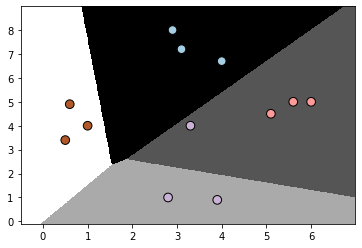

In [152]:
#visulaize the perfromance of the classifier
visualize_classifier(classifier, X, y)

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def visualize_classifier(classifier, X, y):
    #Define the min and max values for X and y 
    # that will beused in the mesh grid
    min_x, max_x = X[:,0].min() - 1.0, X[:,0].max() + 1.0 
    min_y, max_y = y[:,1].min() - 1.0, y[:,1].max() + 1.0
    
    # Define the stepsize to plot the mesh grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    # Run the calssifier on all points on the grid
    output = classifier.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    
    # Reshape the output array
    output = output.reshape(x_vals.shape)
    
    # Creat a plot
    plt.figure()
    
    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.ca.gray)
    
    #Overlay the training poist on the plot
    plt.scatter(X[:,0], X[:,1], c=y, s = 75, edgecolors = 'black', linewidth = 1, cmap=plt.cm.Paired)
    
    
    # Specify bounderies of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.xlim(y_vals.min(), y_vals.max())
    
    # Specify the ticks on the X and y axis
    plt.xticks(np.arange(int(X[:,0].min() - 1), int(X[:,0].max() + 1), 1))
    plt.xticks(np.arange(int(X[:,1].min() - 1), int(X[:,1].max() + 1), 1))
    plt.show
    

In [68]:
visualize_classifier(classifier, X, y)

IndexError: too many indices for array

In [70]:
# Naive Bayes Classifier

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [175]:
## First Method - Import

import os
base_path = "C:/Users/Peyman/Desktop/Python - Practices/"
data_multivar_nb = "data_multivar_nb.txt"
path_to_file = os.path.join(base_path, data_multivar_nb)
fd = open(path_to_file , 'r')


## 2nd Method  - Using 'Open'

# 1) First click on Raw
# 2) Then, press ctrl+s to save it as .ipynb (Note that you'll have to manually type '.ipynb' after the file name to make this work, as files from GitHub are saved as text files as default.)
#    Note that I saved the file as it is not with .ipynb; I don't think it affects the results
# 3) Open jupyter notebook
# 4) Go to location where you saved .ipynb file
# 5) Open file, you will see the code

#data_multivar_nb = open("C:/Users/Peyman/Desktop/Python - Practices/data_multivar_nb.txt", 'w')


In [177]:
# Input file containg data
input_file = 'data_multivar_nb.txt'

In [178]:
# Load the data from this file
data = np.loadtxt(input_file, delimiter=',')

X, y = data[:, :-1], data[:,-1]

 Accuracy of Naive Bayes classifier =  99.75 %


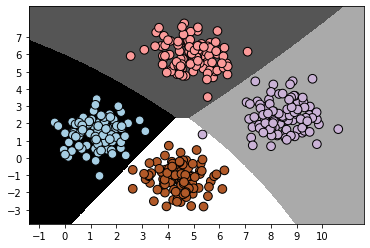

In [280]:
# Create naive bayes classifier
classifier = GaussianNB()

# Train Classifier
classifier.fit(X,y)

# Prideict the values for training data
y_pred =classifier.predict(X) 

# Compute Accuracy
accuracy = 100 * (y==y_pred).sum()/X.shape[0]
print(" Accuracy of Naive Bayes classifier = ", round(accuracy,2), "%")

# Visulaize the performance of the classifier
visualize_classifier(classifier, X, y)



In [282]:
# Split data into training and testing set

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

# Load the data from this file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:,-1]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Make the classifier
classifier_new = GaussianNB()

# Apply the classifier to the training set and test it with test set
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test) # y_test_pred is the predicted y_test

# Detemining accuracy
accuracy = 100 * (y_test == y_test_pred).sum()/X_test.shape[0]
print("Acuracy of new classifier = ",round(accuracy,2), "%")

Acuracy of new classifier =  100.0 %


In [228]:
# An exmaple of train_test_split
# spliting the data set to 60% training and 40% testing data
# [https://scikit-learn.org/stable/modules/cross_validation.html] 

>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> from sklearn import datasets
>>> from sklearn import svm

>>> X, y = datasets.load_iris(return_X_y=True)
>>> X.shape, y.shape
((150, 4), (150,))

>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)

>>> X_train.shape, y_train.shape
((90, 4), (90,))

SyntaxError: invalid syntax (<ipython-input-228-5c98d0f4349d>, line 5)

In [297]:
## Identifying accuracy, precision, and recall values using builtin funcs:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

#############################
#Another metnod for getting accuracy_values 
#num_folds = 3
#scoring = ['precision_macro', 'recall_macro']
#scores = cross_validate(classifier, X, y, scoring=scoring, cv = num_folds )
#sorted(scores.keys())
#scores['test_recall_macro']
#############################

num_folds = 3
accuracy_values = cross_val_score(classifier, X, y, scoring = 'accuracy', cv = num_folds)
print("Accuarcy: " + str(round(100*(accuracy_values.mean()), 2)) + "%")

precision_values = cross_val_score(classifier, X, y, scoring = 'precision_weighted', cv = num_folds)
print("Precision: " + str(round(100*(precision_values.mean()), 2)) + "%")

recall_values = cross_val_score(classifier, X, y, scoring = 'recall_weighted', cv = num_folds)
print("Recall: " + str(round(100*(recall_values.mean()), 2)) + "%")

f1_values = cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = num_folds)
print("F1: " + str(round(100*(f1_values.mean()), 2)) + "%")


Accuarcy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%


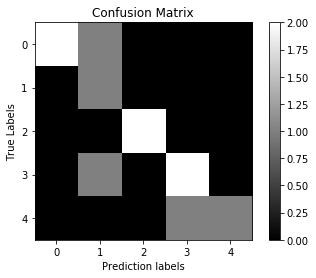

In [307]:
## Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define sample labels
true_labels = [2,0,0,2,4,4,1,0,3,3,3]
pred_labels = [2,1,0,2,4,3,1,0,1,3,3]

# Create confusion matrix
confusion_mat = confusion_matrix(true_labels,pred_labels)

# Visulaize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap = plt.cm.gray)

# Add lable and ticks
plt.title('Confusion Matrix')

plt.colorbar() # adding color bar on the right side

ticks = np.arange(5) # labling the 0-4 on the each axis
plt.xticks(ticks,ticks)
plt.yticks(ticks,ticks)

plt.ylabel('True Labels')
plt.xlabel('Prediction labels')

plt.show() # [Be nazaram kare khasi nimokone!]




In [393]:
## Suport Vector Machine

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.model_selection import cross_validate

# input file containg data
input_file = 'income_data.txt'

#Read the data
X = [] 
y = [] 
count_class1 = 0 
count_class2 = 0 
max_datapoints = 25000

# Open the file and start reading the lines
# The data is a mixture of text and numbers
# The data saved in 'Python Practices' folder on the Desktop

with open("C:/Users/Peyman/Desktop/Python - Practices/income_data.txt", 'r') as f: 
    for line in f.readlines(): 
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints: 
            break 
        if '?' in line: 
            continue 
        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1 

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1 
            
# Convert the list into a numpt array that can be given as an input to the sklearn func
X = np.array(X)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape) 
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:,i] = X[:,i] 
    else: 
        label_encoder.append(preprocessing.LabelEncoder()) 
        X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
        
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:,-1].astype(int)

# Creat SVM classifier
classifier  = OneVsOneClassifier(LinearSVC(random_state=0))

# Train Classifier
classifier.fit(X,y)

# Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# Initialize One vs One Classifier using a linear kernel
classifier = OneVsOneClassifier(LinearSVC(random_state = 0))

# Train
classifier.fit(X_train,y_train)

# Test
y_test_pred = classifier.predict(X_test)

# Compute F1 score of the SVM classifier
f1 = cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = 3)
print ("F1 Score: "+ str(round(100*f1.mean(), 2)) + "%")



C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 Score: 70.82%


C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [400]:
# Test code for checking input_data with one row 
# the input data in SVM program was changed to a signle cell list.
# the actual data has some indicator at the end of each line (line fit = LF). To see the indicators you should use Notepad ++ (good environment because you can see unvisible indicators with this data text editor and it helps you to write your language and it does the editing itself automatically like teking care of indents )

## Suport Vector Machine

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.model_selection import cross_validate

# predict output for the test datapoint
input_data = [['37', 'Privaite', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners','Not-in-family', 'White', 'Male','0','0','40','United-States']]

#Read the data
X = [] 
y = [] 
count_class1 = 0 
count_class2 = 0 
max_datapoints = 25000

# Open the file and start reading the lines
# The data is a mixture of text and numbers
# The data saved in 'Python Practices' folder on the Desktop

with open("C:/Users/Peyman/Desktop/Python - Practices/income_data.txt", 'r') as f: 
    for line in f.readlines(): 
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints: 
            break 
        if '?' in line: 
            continue 
        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1 

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1 
            
# Convert the list into a numpt array that can be given as an input to the sklearn func
X = np.array(X)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape) 
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:,i] = X[:,i] 
    else: 
        label_encoder.append(preprocessing.LabelEncoder()) 
        X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
        
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:,-1].astype(int)

# Creat SVM classifier
classifier  = OneVsOneClassifier(LinearSVC(random_state=0))

# Train Classifier
classifier.fit(X,y)

# Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# Initialize One vs One Classifier using a linear kernel
classifier = OneVsOneClassifier(LinearSVC(random_state = 0))

# Train
classifier.fit(X_train,y_train)

# Test
y_test_pred = classifier.predict(X_test)

# Compute F1 score of the SVM classifier
f1 = cross_val_score(classifier, X, y, scoring = 'f1_weighted', cv = 3)
print ("F1 Score: "+ str(round(100*f1.mean(), 2)) + "%")





C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 Score: 70.82%


C:\Users\Peyman\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [402]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.model_selection import cross_validate

# predict output for the test datapoint
input_data = [['37', 'Privaite', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners','Not-in-family', 'White', 'Male','0','0','40','United-States']]


# Encode test datapoint
input_data_encoded = [-1]*len(input_data)
count = 0


#for i,item in enumerate(X[0]):
#    if item.isdigit(): 
#        X_encoded[:,i] = X[:,i] 
#    else: 
#        label_encoder.append(preprocessing.LabelEncoder()) 
#        X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])




for i, item in enumerate(input_data): # Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        #label_encoder.append(preprocessing.LabelEncoder())
        #print(label_encoder)
        input_data_encoded[i] = int(label_encoder[count].fit_transform(input_data[i]))
        count +=1
input_data_encoded = np.array(input_data_encoded)




AttributeError: 'list' object has no attribute 'isdigit'

In [388]:
# Run classifier on encoded datapoint and print output
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])

  
 

ValueError: Expected 2D array, got 1D array instead:
array=[37 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

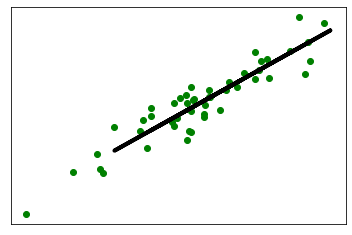

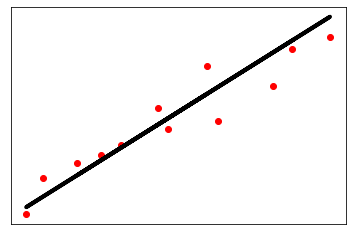

Linrear regressor performance: 
Mean absolute error =  0.59
Mean squared error =  0.49
Median absolute error =  0.51
Explianed variance score =  0.86
R2 score =  0.86

New mean absolute error = 0.59


In [433]:
## Single variable regression model (regressor)

# Python pickle module is used for serializing and de-serializing a Python object structure. ... Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
import pickle
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Input data; Github of this course --> chapter 2 --> click on the name of data --> Raw --> right click - save in Python Practice folder
input_file = open("C:/Users/Peyman/Desktop/Python - Practices/data_singlevar_regr.txt", 'r')

#Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:,-1]

# Split into training and testing set
num_training = int(0.8*len(X))
num_test = len(X) - num_training

#Training data
X_train, y_train, = X[:num_training], y[:num_training] # X[:num_training] means slicing data from index zero to num_training-1 # this made in a way that a[:3]+a[3:]=a

# Test data
X_test, y_test = X[num_training:], y[num_training:]

# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training set
regressor.fit(X_train, y_train)

# Pridic the output
y_test_pred = regressor.predict(X_test)

#Plot the training set and obtained regression line
plt.scatter(X_train, y_train, color='green')
plt.plot(X_test, y_test_pred, color="black", linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# The regression line was made based on the training set, then the line is used for the test set and the second plot shows the success of the regression results

#Plot the output
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_test_pred, color="black", linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute performance metrics
print("Linrear regressor performance: ")
print("Mean absolute error = ", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error = ", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explianed variance score = ", round(sm.explained_variance_score(y_test, y_test_pred),2)) 
print("R2 score = ", round(sm.r2_score(y_test, y_test_pred), 2))


# variance score=1−Var[y^−y]/Var[y] , where the Var is 'biased variance'; i.e. Var[y^−y]=sum(error2−mean(error))/n. Compared with R2, the only difference is from the mean(error). if mean(error)=0, then R2 = explained variance score

# Saving the model into a file for later use through using 'pickle'

# Model persistence
output_model_file = 'model.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)
    
# Now we load the model from the file on the disk and perform prediction
# Load the model:
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)
    
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)

print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))


In [442]:
## Multivariable Regressor

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

# input file containg data
input_file = open("C:/Users/Peyman/Desktop/Python - Practices/data_multivar_regr.txt", 'r')

# Load the data from the input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:,:-1], data[:,-1]

# Split the data into training and testing
num_training = int(0.8*len(X))
num_test = len(X) - num_training

# Training set
X_train, y_train = X[:num_training], y[:num_training]

# Test set
X_test, y_test = X[num_training:], y[num_training:]

# Creat the linear regressor model:
linear_regressor = linear_model.LinearRegression()

# Train the model using the training set
linear_regressor.fit(X_train, y_train)

# predict the output for the test set
y_test_pred = linear_regressor.predict(X_test)

# Measure performance metrics
print("Linear regressor performance using multivariable regressor: ")
print("Mean Absolute Error = ", round(sm.mean_absolute_error(y_test, y_test_pred),2))
print("Mean Squared Error = ", round(sm.mean_squared_error(y_test, y_test_pred),2))
print("Median Absolute Error = ", round(sm.median_absolute_error(y_test,y_test_pred),2))
print("Explained Variance Score = ", round(sm.explained_variance_score(y_test,y_test_pred),2))
print("R2 Score = ", round(sm.r2_score(y_test, y_test_pred),2))

# Create a polynomial regressor of degree 10. --> Train dataset --> Make a sample data point --> Perform prediction 


polynomial = PolynomialFeatures(degree = 10) # 10 darajeye polynomial ast; (dafualt: degree=2 parabola) 
X_train_transformed = polynomial.fit_transform(X_train)
datapoint =[[7.66, 6.29, 5.66]] # [[7.75, 6.36, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)


# Create a linear regressor object and perform polynimial fit using both linear and polynomial regressors
# the datapoint selected above is the 11th row of the data_multivar_regr: [7.66, 6.29, 5.66, 41.35]
# the following code that gets three first numbers of [7.66, 6.29, 5.66], suppose to predict 41.35
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print("\nLinear regression:\n", linear_regressor.predict(datapoint))
print("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))



Linear regressor performance using multivariable regressor: 
Mean Absolute Error =  3.58
Mean Squared Error =  20.31
Median Absolute Error =  2.99
Explained Variance Score =  0.86
R2 Score =  0.86

Linear regression:
 [35.46654397]

Polynomial regression:
 [40.94049094]


In [445]:
# Estimating Housing prices with SVM

import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

# Load housing data
data = datasets.load_boston()

# Shuffle the data
X, y = shuffle(data.data, data.target, random_state = 7)

# Split the data into training and test sets
num_training = int(0.8*len(X))
X_trian, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:],y[num_training:]

# Create Support Vector Regressor
# linear kernel is used 
# C-value = penalty for training error; The higher the C is, the fitter the model is to the training data
# epsilon  = threshold; there is no penalty for training error if the predicted value is within this distance from the actual value

sv_regressor = SVR(kernel = 'linear', C = 1.0, epsilon = 0.1)

# Train Support Vecotr Regressor
sv_regressor.fit(X_train, y_train)

# Evaluate the performance of Support Vector Regressor
y_test_pred = sv_regressor.predict(X_test) # Avval estimate ro dorost kon

mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)

print("\n###Performance###")
print("Mean squared error = ", round(mse,2))
print("Explained variance error = ", round(evs,2))


ValueError: Found input variables with inconsistent numbers of samples: [560, 404]